### Initialize environment, dependencies, and constants:

In [2]:
# Import packages
import os

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import quandl as qd
from dotenv import load_dotenv

# Load dotenv variables
load_dotenv()

# Set Quanld API key
qd.ApiConfig.api_key = os.getenv("QUANDL_API_KEY")

# Set seaborn theme
sns.set_theme(style="darkgrid")

# Set seaborn plot size
sns.set(rc={'figure.figsize':(11,5)})


### Fetch data

In [3]:
# Fetch Microsoft's end of day stock prices from 1st Nov, 2013 to 1st Nov, 2020
msft_data = qd.get("EOD/MSFT", start_date="2013-10-01", end_date="2020-10-01")

### Basic exploration

**General information**

In [4]:
msft_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1070 entries, 2013-10-01 to 2017-12-28
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1070 non-null   float64
 1   High        1070 non-null   float64
 2   Low         1070 non-null   float64
 3   Close       1070 non-null   float64
 4   Volume      1070 non-null   float64
 5   Dividend    1070 non-null   float64
 6   Split       1070 non-null   float64
 7   Adj_Open    1070 non-null   float64
 8   Adj_High    1070 non-null   float64
 9   Adj_Low     1070 non-null   float64
 10  Adj_Close   1070 non-null   float64
 11  Adj_Volume  1070 non-null   float64
dtypes: float64(12)
memory usage: 108.7 KB


**Description**

In [5]:
msft_data.describe()

Open         High          Low        Close        Volume  \
count  1070.00000  1070.000000  1070.000000  1070.000000  1.070000e+03   
mean     52.96032    53.373297    52.551683    52.992939  3.129070e+07   
std      12.65303    12.682530    12.605932    12.651352  1.606381e+07   
min      33.07000    33.330000    32.800000    33.010000  7.425603e+06   
25%      43.21500    43.692500    42.928725    43.362500  2.175006e+07   
50%      49.91500    50.527500    49.585000    50.050000  2.788540e+07   
75%      60.95000    61.377475    60.730000    61.070000  3.587136e+07   
max      87.12000    87.499900    86.230000    86.850000  2.025224e+08   

          Dividend   Split     Adj_Open     Adj_High      Adj_Low  \
count  1070.000000  1070.0  1070.000000  1070.000000  1070.000000   
mean      0.005402     1.0    48.823113    49.202277    48.447768   
std       0.042928     0.0    13.219486    13.257994    13.165062   
min       0.000000     1.0    28.557195    28.781715    28.324040   
25%       0.000000     1.0    38.784383    39.221152    38.531416   
50%       0.000000     1.0    46.294119    46.848994    45.940413   
75%       0.000000     1.0    57.492328    57.869636    57.063140   
max       0.420000     1.0    84.004465    84.370779    83.146293   

         Adj_Close    Adj_Volume  
count  1070.000000  1.070000e+03  
mean     48.853077  3.129070e+07  
std      13.218921  1.606381e+07  
min      28.505382  7.425603e+06  
25%      38.909519  2.175006e+07  
50%      46.358213  2.788540e+07  
75%      57.605520  3.587136e+07  
max      83.744121  2.025224e+08

**First five rows**

In [6]:
msft_data.head()

Open   High    Low  Close      Volume  Dividend  Split  \
Date                                                                  
2013-10-01  33.35  33.61  33.30  33.58  36718700.0       0.0    1.0   
2013-10-02  33.36  34.03  33.29  33.92  46946800.0       0.0    1.0   
2013-10-03  33.88  34.00  33.42  33.86  38703800.0       0.0    1.0   
2013-10-04  33.69  33.99  33.62  33.88  33008100.0       0.0    1.0   
2013-10-07  33.60  33.71  33.20  33.30  35069300.0       0.0    1.0   

             Adj_Open   Adj_High    Adj_Low  Adj_Close  Adj_Volume  
Date                                                                
2013-10-01  28.798985  29.023505  28.755808  28.997599  36718700.0  
2013-10-02  28.807621  29.386191  28.747173  29.291202  46946800.0  
2013-10-03  29.256660  29.360285  28.859433  29.239390  38703800.0  
2013-10-04  29.092588  29.351649  29.032141  29.256660  33008100.0  
2013-10-07  29.014870  29.109859  28.669455  28.755808  35069300.0

**Get monthly  average**

In [7]:
mean_by_month = msft_data.resample('M').mean()

mean_by_month.head()

Open       High        Low      Close        Volume  \
Date                                                                   
2013-10-31  34.355222  34.631517  34.108000  34.381957  4.197093e+07   
2013-11-30  37.227245  37.557500  37.042750  37.362100  4.002158e+07   
2013-12-31  37.508100  37.769286  37.110810  37.455238  3.936275e+07   
2014-01-31  36.427381  36.689048  35.942857  36.350000  4.429649e+07   
2014-02-28  37.230005  37.549947  36.962895  37.241842  3.712129e+07   

            Dividend  Split   Adj_Open   Adj_High    Adj_Low  Adj_Close  \
Date                                                                      
2013-10-31  0.000000    1.0  29.667032  29.905624  29.453547  29.690119   
2013-11-30  0.014000    1.0  32.245654  32.531531  32.085988  32.362141   
2013-12-31  0.000000    1.0  32.636507  32.863770  32.290817  32.590511   
2014-01-31  0.000000    1.0  31.696153  31.923834  31.274560  31.628823   
2014-02-28  0.014737    1.0  32.510585  32.789999  32.277596  32.521179   

              Adj_Volume  
Date                      
2013-10-31  4.197093e+07  
2013-11-30  4.002158e+07  
2013-12-31  3.936275e+07  
2014-01-31  4.429649e+07  
2014-02-28  3.712129e+07

### Calculate returns

A financial return is simply the money made or lost on an investment. A return can be expressed nominally as the change in the amount of an investment over time. It can be calculated as the percentage derived from the ratio of profit to investment.


**Daily return**

In [8]:
# Get adjusted close value as daily_close
daily_close = msft_data[['Adj_Close']]

# Calculate percent of change
daily_return_with_nan = daily_close.pct_change()

# Fill NaN values w/ 0
daily_return = daily_return_with_nan.fillna(0)

daily_return.head()

Adj_Close
Date                 
2013-10-01   0.000000
2013-10-02   0.010125
2013-10-03  -0.001769
2013-10-04   0.000591
2013-10-07  -0.017119

**Monthly return**

In [9]:
# Get adjusted close value for last day of each month
last_day_of_month_data = daily_close.resample('M').apply(lambda x: x[-1])

# Calculate percentage change in each month
monthly_return_with_nan = last_day_of_month_data.pct_change()

# Fill NaN values w/ 0
monthly_return = monthly_return_with_nan.fillna(0)

monthly_return.head()

Adj_Close
Date                 
2013-10-31   0.000000
2013-11-30   0.085174
2013-12-31  -0.018883
2014-01-31   0.011494
2014-02-28   0.019996

### Calculate simple moving average (SMA)

In [10]:
daily_adjusted_price = msft_data['Adj_Close']

simple_moving_avg_with_null = daily_adjusted_price.rolling(window=50).mean()

simple_moving_avg = simple_moving_avg_with_null.fillna(0)

simple_moving_avg.tail()

Date
2017-12-21    79.562721
2017-12-22    79.732010
2017-12-26    79.892078
2017-12-27    80.055054
2017-12-28    80.219375
Name: Adj_Close, dtype: float64

(array([16071., 16252., 16436., 16617., 16801., 16983., 17167., 17348.,
        17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

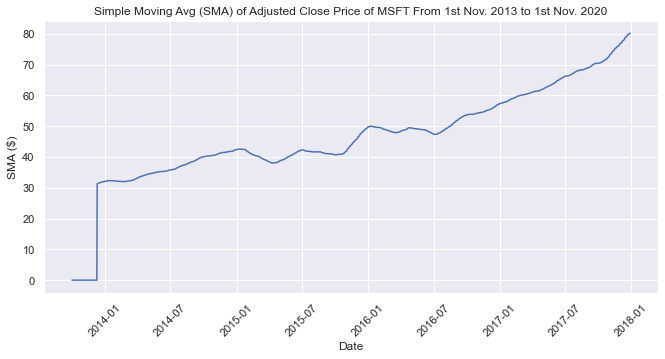

In [11]:
fig = sns.lineplot(simple_moving_avg.index, simple_moving_avg.values)
plt.ylabel("SMA ($)")
plt.title("Simple Moving Avg (SMA) of Adjusted Close Price of MSFT From 1st Nov. 2013 to 1st Nov. 2020")
plt.xticks(rotation=45)

We also visualize daily adjusted prices to show the difference in fluctuations between SMA and daily values.

(array([16071., 16252., 16436., 16617., 16801., 16983., 17167., 17348.,
        17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

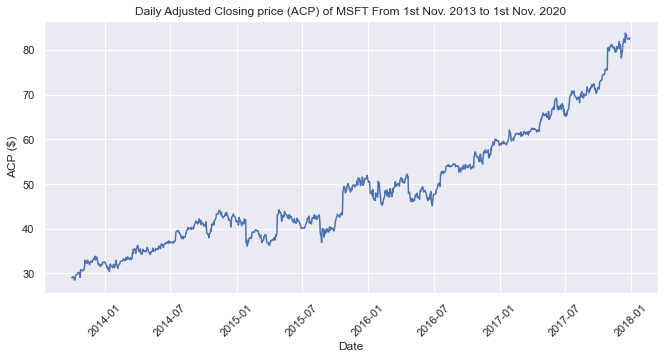

In [12]:
sns.lineplot(daily_adjusted_price.index, daily_adjusted_price.values)
plt.ylabel("ACP ($)")
plt.title("Daily Adjusted Closing price (ACP) of MSFT From 1st Nov. 2013 to 1st Nov. 2020")
plt.xticks(rotation=45)

### Measure fluctuation (squared daily return and standard deviation)

First, plot daily return and SMA of daily returns w/ window size of 50.

(array([16071., 16252., 16436., 16617., 16801., 16983., 17167., 17348.,
        17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

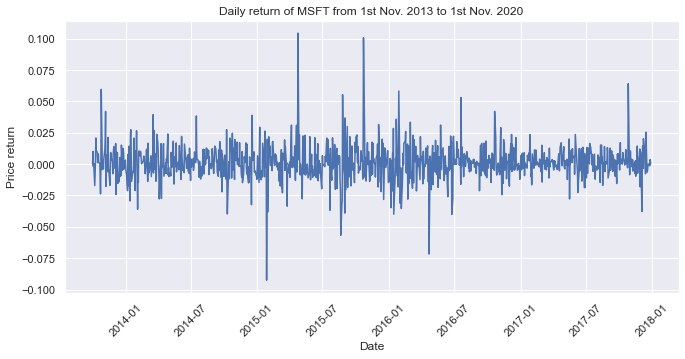

In [13]:
sns.lineplot("Date", "Adj_Close", data=daily_return)
plt.ylabel("Price return")
plt.title("Daily return of MSFT from 1st Nov. 2013 to 1st Nov. 2020")
plt.xticks(rotation=45)

Now, we calculate and plot daily return squared to visualize the sheer value of daily fluctuations. 

In [14]:
daily_return_squared = daily_return ** 2
daily_return_squared.head()

Adj_Close
Date                    
2013-10-01  0.000000e+00
2013-10-02  1.025171e-04
2013-10-03  3.128894e-06
2013-10-04  3.488880e-07
2013-10-07  2.930685e-04

(array([16071., 16252., 16436., 16617., 16801., 16983., 17167., 17348.,
        17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

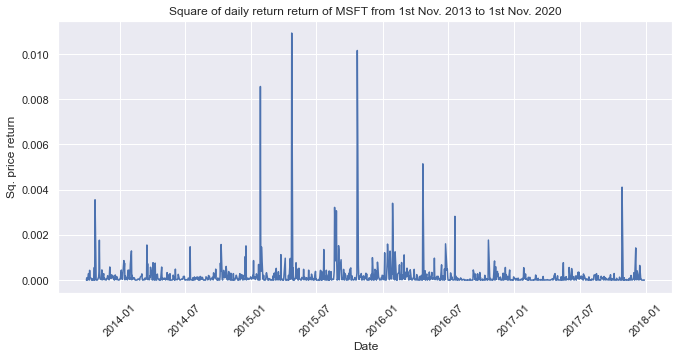

In [15]:
sns.lineplot("Date", "Adj_Close", data=daily_return_squared)
plt.ylabel("Sq. price return")
plt.title("Square of daily return return of MSFT from 1st Nov. 2013 to 1st Nov. 2020")
plt.xticks(rotation=45)

### Formulating a momentum-based Simple Moving Average Crossover (SMAC) strategy

The SMAC strategy is a well-known schematic momentum strategy. It is a long-only strategy. Momentum, here, is the total return of stock including the dividends over the last n months.

A buy signal is generated when the shorter lookback rolling mean (or moving average) overshoots the longer lookback moving average. A sell signal occurs when the shorter lookback moving average dips below the longer moving average.


In [16]:
# Initialize the short and long lookback periods
short_lookback = 120
long_lookback = short_lookback * 50


# Initialize a new DataFrame called signal_df with a signal column
signal_df = pd.DataFrame(index=msft_data.index)
signal_df['signal'] = 0.0

# Create a short simple moving average over the short lookback period
signal_df['short_mav'] = msft_data['Adj_Close'].rolling(window=short_lookback, min_periods=1, center=False).mean()

# Createa  long simple moving average over the long lookback period
signal_df['long_mav'] = msft_data['Adj_Close'].rolling(window=long_lookback, min_periods=1, center=False).mean()

# Generate the signals based on the conditional statement
signal_df['signal'] = np.where(signal_df['short_mav'] > signal_df['long_mav'], 1.0, 0.0)   

# Create the trading orders based on the positions column
signal_df['positions'] = signal_df['signal'].diff()

signal_df.tail()

signal  short_mav   long_mav  positions
Date                                               
2017-12-21     1.0  74.141882  48.726731        0.0
2017-12-22     1.0  74.279624  48.758338        0.0
2017-12-26     1.0  74.420537  48.789787        0.0
2017-12-27     1.0  74.556864  48.821457        0.0
2017-12-28     1.0  74.689136  48.853077        0.0

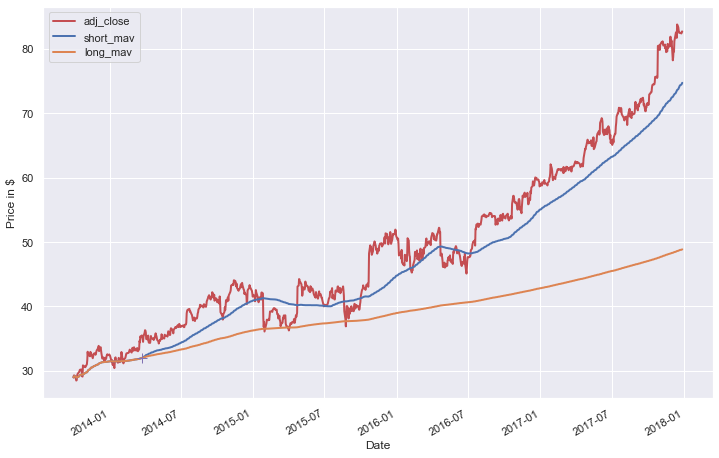

In [17]:
fig = plt.figure()

# Add a subplot and label for y-axis
plt1 = fig.add_subplot(111,  ylabel='Price in $')
msft_data['Adj_Close'].plot(ax=plt1, color='r', lw=2., label="adj_close")

# plot the short and long lookback moving averages
signal_df[['short_mav', 'long_mav']].plot(ax=plt1, lw=2., figsize=(12,8))

# plotting the sell signals
plt1.plot(signal_df.loc[signal_df.positions == -1.0].index,                         signal_df.short_mav[signal_df.positions == -1.0],'x',                     markersize=10, color='k')

# plotting the buy signals
plt1.plot(signal_df.loc[signal_df.positions == 1.0].index, signal_df.short_mav[signal_df.positions == 1.0],'+', markersize=10, color='m')

plt.legend()

plt.show()